In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from netCDF4 import Dataset
import os
import tqdm
import datetime

server_dir = '/home/robbie/uit_mnt'
satam_directory = f'{server_dir}/Data/romal7177/ResearchData/IFT/EarthObservation/SatelliteAltimetry/'
scratch=f'{server_dir}/scratch/robbie/nrcs/pickles'
nh_it_dir=f'{satam_directory}OSISAF Sea Ice Type'

sh_it_dir = f'{server_dir}/scratch/robbie/osi_type'
x = Dataset(f'{sh_it_dir}/06/ice_type_sh_polstere-100_multi_201106021200.nc')
sh_latgrid = np.array(x['lat'])

In [3]:
october_masks = {}

for year in np.arange(2010,2023):
    
    month_folder = f'{nh_it_dir}/{year}/10/'
    
    type_string = f'{year}{10}01'
    
    f = f'ice_type_nh_polstere-100_multi_{type_string}1200.nc'

    d_type = Dataset(f'{month_folder}{f}')
    
    longrid = np.array(d_type['lon'])
    latgrid = np.array(d_type['lat'])
    
    ice_type = np.array(d_type['ice_type'][0])
    ice_type[ice_type<2] = 0
    ice_type[ice_type>4] = 0
    ice_type[ice_type>0] = 1
    ice_type[latgrid>87] = 1
    
    october_masks[year] = ice_type

nh_longrid = np.array(d_type['lon'])
nh_latgrid = np.array(d_type['lat'])

nh_masks = {'nh_longrid':nh_longrid,'nh_latgrid':nh_latgrid,'masks':october_masks}

pickle.dump(nh_masks,open('nh_masks','wb'))

In [10]:
october_masks = {}

for year in np.arange(2010,2023):
    
    month_folder = f'{sh_it_dir}/10/'
    
    type_string = f'{year}{10}01'
    
    f = f'ice_type_sh_polstere-100_multi_{type_string}1200.nc'

    d_type = Dataset(f'{month_folder}{f}')
    
    longrid = np.array(d_type['lon'])
    latgrid = np.array(d_type['lat'])
    
    ice_type = np.array(d_type['ice_type'][0])
    ice_type[ice_type<2] = 0
    ice_type[ice_type>4] = 0
    ice_type[ice_type>0] = 1
    ice_type[latgrid>87] = 1
    
    october_masks[year] = ice_type

In [12]:
sh_longrid = np.array(d_type['lon'])
sh_latgrid = np.array(d_type['lat'])

sh_masks = {'sh_longrid':sh_longrid,'sh_latgrid':sh_latgrid,'masks':october_masks}

pickle.dump(sh_masks,open('sh_masks','wb'))

In [13]:
october_masks

{2010: array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int8),
 2011: array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int8)}

In [20]:
d['ice_type']

<class 'netCDF4._netCDF4.Variable'>
int8 ice_type(time, yc, xc)
    long_name: sea ice type
    standard_name: sea_ice_classification
    _FillValue: -1
    grid_mapping: Polar_Stereographic_Grid
    coordinates: lat lon
    flag_values: [1 2 3 4]
    flag_meanings: open_water first_year_ice multi_year_ice ambiguous
    flag_descriptions: 
  1 -> no ice or very open ice 
  2 -> relatively young ice
  3 -> ice that survived a summer melt
  4 -> ambiguous ice type
unlimited dimensions: 
current shape = (1, 830, 790)
filling on

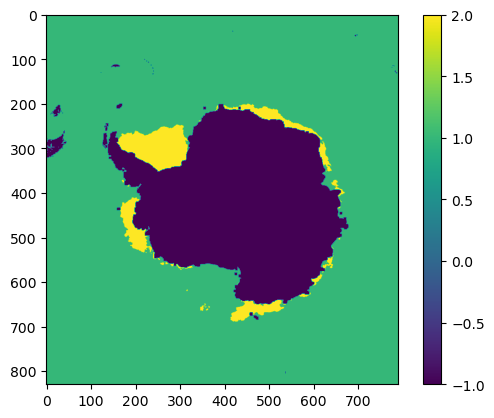

In [24]:
d = Dataset('/home/robbie/uit_mnt/scratch/robbie/osi_type/02/ice_type_sh_polstere-100_multi_201102021200.nc')
ice_type = np.array(d['ice_type'][0])
plt.imshow(ice_type)
plt.colorbar()